# Pratique de geopandas avec les données vélib

``` python
import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/03_geopandas_TP.qmd")
```

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABmanipulation%2003_geopandas_TP%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=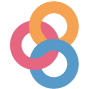" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

Installations préalables :

In [2]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install topojson

In [3]:
!pip install topojson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/82.4 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 10.3 MB/s eta 0:00:00

Les instructions d’installation du package `cartiflette`
sont quant à elles détaillées dans le chapitre
précédent.

In [4]:
import geopandas as gpd

# Lire et enrichir des données spatiales

Dans cette partie,
nous utiliserons
le package [`cartiflette`](https://github.com/InseeFrLab/cartiflette.git)
qui facilite la récupération de contours de cartes.
Une version antérieure de cet exercice, présentée sous forme
d’[exercice supplémentaire 👇️](#exo-supp), utilisait des fonds de carte issus
de `data.gouv`.

In [5]:
# 0) Chargement des packages utilisés dans la partie tutoriel
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

1.  S’inspirer des exemples de code présents dans le chapitre précédent, mobilisant
    le package `cartiflette`
    pour télécharger les données communales des départements 75, 92, 93 et 94.
    Vous pouvez nommer l’objet `communes_borders`
2.  Regarder les premières lignes des données. Identifier la différence avec
    un DataFrame standard.
3.  Afficher l’attribut `crs` de `communes_borders`. Ce dernier contrôle la
    transformation de l’espace tridimensionnel terrestre en une surface plane.
    Utiliser `to_crs` pour transformer les données en Lambert 93 (code EPSG 2154).
4.  Afficher les communes des Hauts de Seine (département 92) et utiliser la méthode
    `plot`
5.  Réprésenter la carte de Paris : quel est le problème ?

:::

In [6]:
import cartiflette.s3 as s3

#1) Chargement des données de Cartiflette
communes_borders = s3.download_vectorfile_url_all(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 14.5kiB [00:00, 178kiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 36.0kiB [00:00, 258kiB/s]

Downloading: : 62.3kiB [00:00, 323kiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 12.0kiB [00:00, 122kiB/s]

Downloading: : 42.0kiB [00:00, 228kiB/s]

Downloading: : 98.0kiB [00:00, 381kiB/s]

Downloading: : 119kiB [00:00, 395kiB/s] 

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 12.0kiB [00:00, 122kiB/s]

Downloading: : 40.0kiB [00:00, 215kiB/s]

Downloading: : 88.0kiB [00:00, 336kiB/s]

Downloading: : 110kiB [00:00, 365kiB/s] 

In [7]:
# 2) Regarder les premières lignes
communes_borders.head()
# Il y a une colonne geometry qui contient les informations nécessaires pour connaître les contours communaux

In [8]:
# 3) Afficher le crs
communes_borders.crs
# Les données sont en WGS84, on les reprojette en lambert 93

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

La carte du 92 est la suivante:

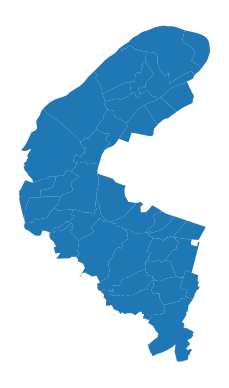

In [9]:
# 4) afficher les communes du département 92
ax = communes_borders[communes_borders['INSEE_DEP'] == "92"].plot()
ax.set_axis_off()

Quant à Paris, à l’issue de la question 5, la carte
aura l’aspect suivant:

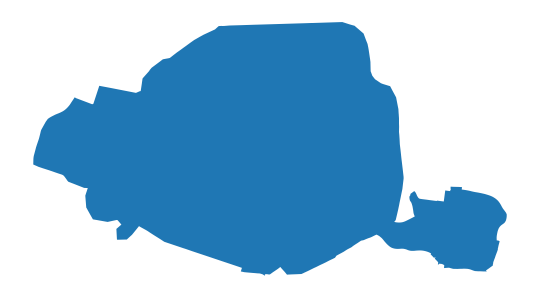

In [10]:
# 5) Représenter la carte de Paris. Quel est le problème ?
ax = communes_borders[communes_borders['INSEE_DEP'] == "75"].plot()
ax.set_axis_off()

En effet, on ne dispose ainsi pas des limites des arrondissements parisiens, ce
qui appauvrit grandement la carte de Paris.
On pourrait les récupérer directement
depuis le site d’*open-data* du Grand Paris, ce qui est proposé
en [exercice supplémentaire 👇️](#exo-supp).
On propose ici d’utiliser à nouveau
`cartiflette` pour cela afin de disposer du fonds de carte officiel.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 2: compléter des données spatiales issues de sources différentes</h3>

1.  Importer les données de découpage des arrondissements parisiens à l’adresse à l’aide de `cartiflette`.
2.  Vérifier sur une carte que les découpages des arrondissements sont bien présents.
3.  Vérifier l’attribut `crs`. Est-il cohérent avec celui des données communales ?
    Si non, transformer en Lambert 93 (code EPSG 2154).
4.  Retirer Paris du jeu de données communales et utiliser les arrondissements
    pour enrichir (nommer l’objet obtenu `data_borders`).
5.  Représenter à nouveau les communes de la petite couronne parisienne (75, 92, 93, 94)

</div>

In [11]:
#1) Importer arrondissements
arrondissements = s3.download_vectorfile_url_all(
    crs = 4326,
    values = ["75"],
    borders="ARRONDISSEMENT_MUNICIPAL",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=ARRONDISSEMENT_MUNICIPAL/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 28.0kiB [00:00, 228kiB/s]

Downloading: : 38.0kiB [00:00, 304kiB/s]

La carte de Paris intra-muros est, après la
récupération des arrondissements avec
`cartiflette` de ce type là:

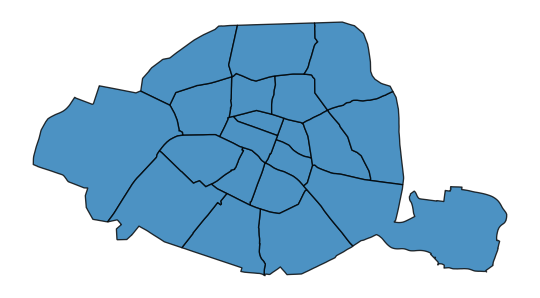

In [12]:
#2) Vérifier présence arrondissements
ax = arrondissements.plot(alpha = 0.8, edgecolor = "k")
ax.set_axis_off()

In [13]:
#3) Vérifier l'attribut `crs`. Est-il cohérent ?
print(communes_borders.crs)
print(arrondissements.crs)
arrondissements = arrondissements.to_crs(2154)
print(communes_borders.crs == arrondissements.crs)

EPSG:4326
EPSG:4326
False

In [14]:
#4) Retirer Paris et ajouter les arrondissements
import pandas as pd

data_paris = pd.concat(
  [
    communes_borders[communes_borders['INSEE_DEP'] != "75"].to_crs(2154),
    arrondissements.to_crs(2154)
  ])

La carte obtenue à l’issue de la question 6, c’est-à-dire après
avoir consolidé les données, devrait avoir l’aspect suivant:

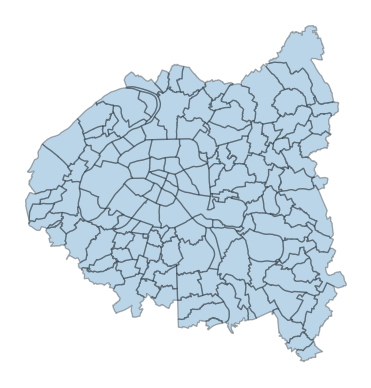

In [15]:
#5) Représenter les communes du 75, 92, 93, 94
ax = data_paris.plot(alpha = 0.3, edgecolor = "k")
ax.set_axis_off()

# Utiliser des données géographiques comme des couches graphiques

Souvent, le découpage communal ne sert qu’en fond de cartes, pour donner des
repères. En complément de celui-ci, on peut désirer exploiter
un autre jeu de données.

On va partir des données de localisation des
stations velib,
disponibles [sur le site d’open data de la ville de Paris](https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/table/) et
requêtables directement par l’url
<https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr>

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 3: importer et explorer les données velib</h3>

1.  Importer les données velib sous le nom `station`
2.  Vérifier la projection géographique de `station` (attribut `crs`). Si celle-ci est différente des données communales, reprojeter ces
    dernières dans le même système de projection que les stations de vélib
3.  Représenter sur une carte les 50 stations les plus importantes (variable `capacity`). Vous pouvez également afficher le fonds de carte des arrondissements de Paris.
    Cette [page](https://geopandas.org/mapping.html#maps-with-layers) peut vous aider pour comprendre comment afficher plusieurs couches à la fois. Vous pouvez customiser la carte en retirant les axes grâce à la méthode `set_axis_off` et mettre un titre tel que *“Les 50 principales stations de Vélib”* avec la méthode `set_title`.
4.  Afficher également (trait bleu et épais) les réseaux de transport en communs, disponibles [ici](https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/map/?location=7,48.69717,2.33167&basemap=jawg.streets). L’url à requêter est
    <https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr>

</div>

In [16]:
# 1) Importer les données velib
from cartiflette.utils import download_pb
url = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"

# sometimes, geopandas files to import directly from
# url so proceeding in two times
download_pb(url, "velib.geojson")
stations = gpd.read_file("velib.geojson")
stations.head()

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 361kiB [00:00, 3.99MiB/s]

In [17]:
# 2) Reprojection
stations.crs
data_paris = data_paris.to_crs(stations.crs)

La carte attendu à l’issue de la question 3 a l’aspect suivant:

Text(0.5, 1.0, 'Les 50 principales stations de Vélib')

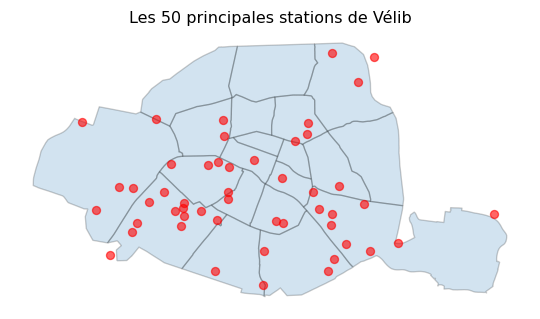

In [18]:
# 3) Carte des 50 stations les plus importantes. 
base = data_paris[data_paris['INSEE_DEP'] == '75'].plot(alpha = 0.2, edgecolor = 'black')
stations.sort_values('capacity', ascending = False).head(50).plot(ax = base, color = 'red', alpha = 0.6)
base.set_axis_off()
base.set_title("Les 50 principales stations de Vélib")

In [19]:
# 4) Réseaux de transport en communs
url = "https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
# sometimes, geopandas files to import directly from
# url so proceeding in two times
download_pb(url, "transports.geojson")
transports = gpd.read_file("transports.geojson")
transports.head()
print(transports['mode'].unique())

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 228kiB [00:00, 1.78MiB/s]

Downloading: : 621kiB [00:00, 2.51MiB/s]

Downloading: : 1.92MiB [00:00, 5.34MiB/s]

Downloading: : 3.25MiB [00:00, 6.79MiB/s]

['TRAMWAY' 'RER' 'TRAIN' 'TER' 'METRO' 'NAVETTE']

L’ajout du réseau de métro permet d’obtenir une carte ressemblant à celle-ci:

Text(0.5, 1.0, 'Les 50 principales stations de Vélib')

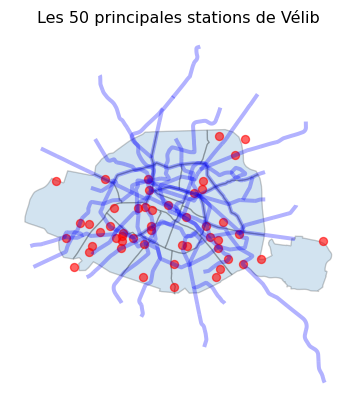

In [20]:
# 4) Réseaux de transport en communs (suite)
base = data_paris[data_paris['INSEE_DEP'] == '75'].plot(alpha = 0.2, edgecolor = 'black')
stations.sort_values('capacity', ascending = False).head(50).plot(ax = base, color = 'red', alpha = 0.6)
transports[transports['mode'] == "METRO"].plot(ax=base, color = 'blue', alpha = 0.3,linewidth=3)
base.set_axis_off()
base.set_title("Les 50 principales stations de Vélib")

Pour faire une belle carte, il faudrait couper les lignes de métro via une jointure spatiale ou
utiliser un fonds de carte conceptuel.
L’exercice suivant propose de mettre en oeuvre la deuxième méthode. La première
est proposée en [exercice supplémentaire 👇️](#exo-supp).

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 4: ajouter un fond de carte</h3>

1.  Recréer par couche successive la carte précédente, que vous pouvez nommer `base`
2.  Utiliser `add_basemap` du package [`contextily`](https://contextily.readthedocs.io/en/latest/)
    pour ajouter, en arrière plan, un fonds de carte
3.  Jouer avec les fonds disponibles en utilisant l’argument `source`

</div>

Par exemple, en utilisant le fond `Stamen.Watercolor`, on obtient la carte
suivante. Celle-ci permet déjà de mieux localiser les stations.

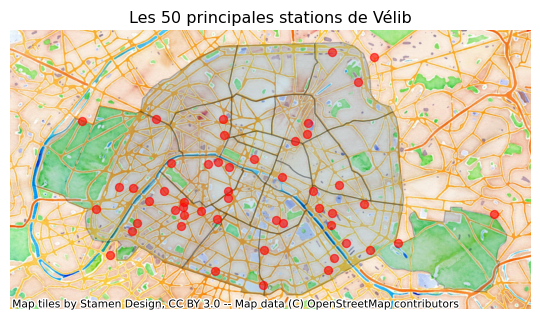

In [21]:
base = data_paris[data_paris['INSEE_DEP'] == '75'].to_crs(3857).plot(alpha = 0.2, edgecolor = 'black')
stations.sort_values('capacity', ascending = False).head(50).to_crs(3857).plot(ax = base, color = 'red', alpha = 0.6)
base.set_axis_off()
base.set_title("Les 50 principales stations de Vélib")
ctx.add_basemap(base, source=ctx.providers.Stamen.Watercolor)

# Jointures spatiales

Les jointures attributaires fonctionnent comme avec un DataFrame `pandas`.
Pour conserver un objet spatial *in fine*, il faut faire attention à utiliser en premier (base de gauche) l’objet `GeoPandas`.
En revanche, l’un des intérêts des objets geopandas est qu’on peut également faire une jointure sur la dimension spatiale grâce à `sjoin`.

La documentation à laquelle se référer est [ici](https://geopandas.org/mergingdata.html#spatial-joins).

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 5 : Associer les stations aux communes et arrondissements auxquels elles appartiennent</h3>

1.  Faire une jointure spatiale pour enrichir les données de stations en y ajoutant des informations de `data_paris`. Appeler cet objet `stations_info`
2.  Représenter la carte des stations du 19e arrondissement (s’aider de la variable `c_ar`). Vous pouvez mettre en fond de carte les arrondissements parisiens.
3.  Compter le nombre de stations velib et le nombre de places velib par arrondissement ou commune (pour vous aider, vous pouvez compléter vos connaissances avec [ce tutoriel](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)). Représenter sur une carte chacune des informations
4.  Représenter les mêmes informations mais en densité (diviser par la surface de l’arrondissement ou commune en km2)
5.  (optionnel) Choisir une des cartes de densité et la nettoyer (retirer les axes, mettre les titres…)

</div>

In [22]:
#1.  Jointure spatiale entre stations et data_paris
stations_info = gpd.sjoin(stations, data_paris, predicate = 'within')
stations_info.head()

Pour la question 2,
la première méthode consiste à afficher
toute la ville mais à ne représenter que
les points des stations du 19e:

<Axes: >

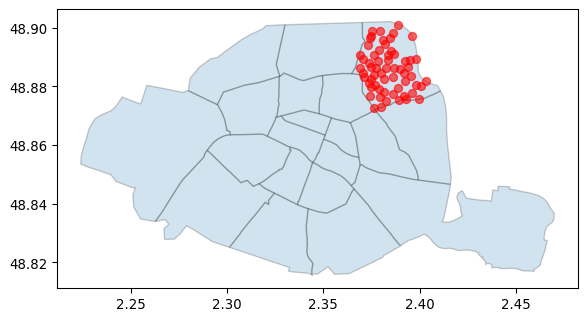

In [23]:
#2. Carte des stations du 19e arrondissement
# Méthode 1 : En affichant tout Paris
base = data_paris[data_paris['INSEE_DEP'] == "75"].plot(alpha = 0.2, edgecolor = 'k') #fond de carte des arrondissements
stations_19 = stations_info.loc[stations_info['NOM'].str.contains("19e")]
stations_19.plot(ax = base, color = 'red', alpha = 0.6) # stations du 19e

Néanmoins, il est préférable de se centrer sur
le 19e en premier lieu, ce qui donne une
carte comme celle-ci:

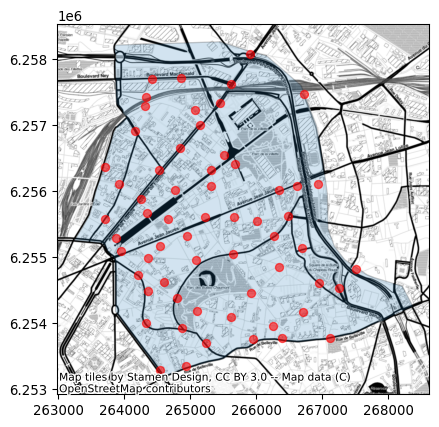

In [24]:
# Méthode 2 : En affichant seulement le 19e
base = data_paris[data_paris['NOM'].str.contains("19e")].to_crs(3857).plot(alpha = 0.2, edgecolor = 'k') #fond de carte du 19e
stations_info[stations_info['NOM'].str.contains("19e")].to_crs(3857).plot(ax = base, color = 'red', alpha = 0.6) #stations du 19e
ctx.add_basemap(base, source=ctx.providers.Stamen.Toner)

In [25]:
#3. Nombre de stations et de places vélib par arrondissement
stations_agg = stations_info.groupby('NOM').agg({'stationcode': 'nunique',
                                   'capacity': 'sum'}).reset_index()
stations_agg.head()
df = data_paris.merge(stations_agg, how = 'inner')
df.head()

La carte des places disponibles est celle-ci:

Text(0.5, 1.0, 'Nombre de places disponibles')

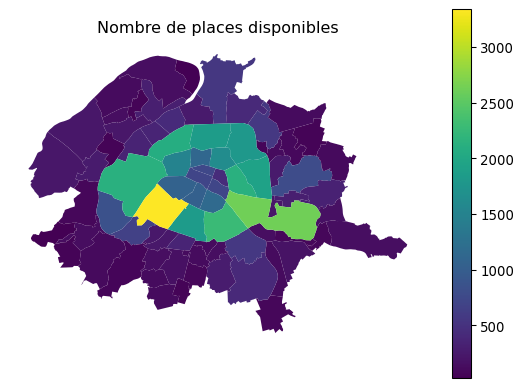

In [26]:
#3. Nombre de stations et de places vélib par arrondissement
ax = df.plot(column = 'capacity', legend=True)
ax.set_axis_off()
ax.set_title("Nombre de places disponibles")

Alors que la carte des capacités de stations est
plutôt celle-là:

Text(0.5, 1.0, 'Nombre de stations')

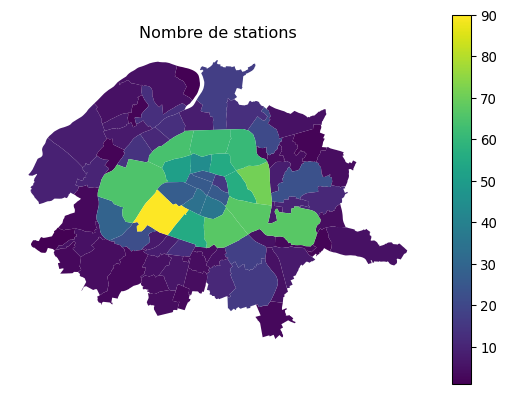

In [27]:
#3. Nombre de stations et de places vélib par arrondissement
ax = df.plot(column = 'stationcode', legend=True)
ax.set_axis_off()
ax.set_title("Nombre de stations")

Pas vraiment de différence marquée entre les
deux, on peut se contenter de regarder la capacité.

Enfin, dans la question 4,
si on représente plutôt la capacité
sous forme de densité, pour tenir compte
de la taille différente des arrondissements,
on obtient cette carte:

<Axes: >

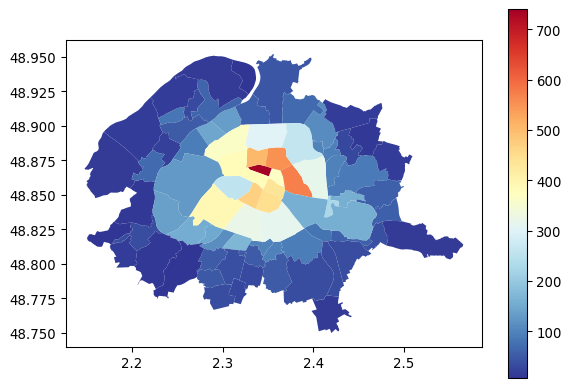

In [28]:
#4. En densité
cols = ['stationcode','capacity']
df[[s + '_density' for s in cols]] = df[cols].div(df.to_crs(2158).area*10**(-6), axis = 0)
df.plot(column = 'capacity_density', cmap = 'RdYlBu_r', legend=True)

Avec une palette `plasma_r`, cela donne plutôt cette carte:

<Axes: >

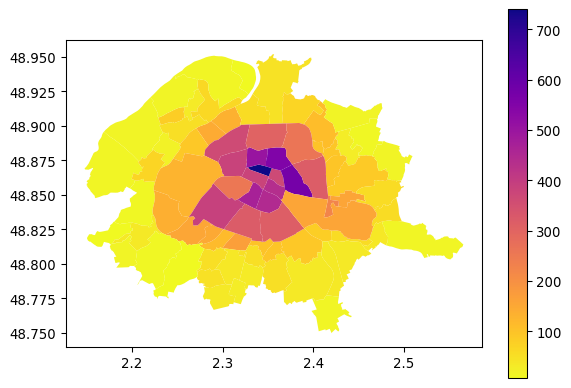

In [29]:
#4. En densité
df.plot(column = 'capacity_density', cmap = 'plasma_r', legend=True)

Avec un peu de travail sur l’esthétique, la carte
que vous obtenez à l’issue de l’exercice
ressemble à celle-ci:

In [30]:
# 5 Cartes nettoyées
ax = df.plot(column = 'capacity_density', cmap = 'RdYlBu_r', legend=True, legend_kwds={"orientation": "horizontal", "pad": 0.01}) 
ax.set_axis_off()
ax.set_title("Densité des stations vélib dans l'agglomération parisienne")

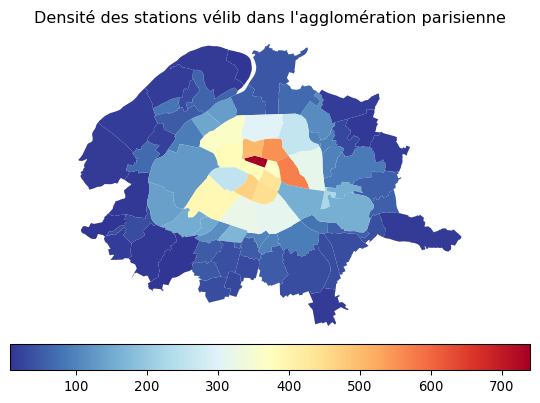

In [31]:
ax.get_figure()

In [32]:
fig = ax.get_figure()
fig.savefig("featured.png")

# Trouver les toilettes publiques les plus proches

## Objectif

Jusqu’à présent, nous nous sommes familiarisés avec
la manipulation de données spatiales et la représentation
rapide de celle-ci grâce aux fonctionalités de `GeoPandas`.

A partir de maintenant, nous allons utiliser `GeoPandas`
pour des tâches de manipulation géométrique.  
Ces opérations reposeront sur des tâches classiques
de la géomatique qui sont facilitées par le fait que
`GeoPandas` offre une surcouche au package `Shapely`
de la même manière que `Pandas` était une sur-couche
de `Numpy` pour les opérations numériques.

L’exemple suivant permet d’illustrer
le principe d’une des
opérations que nous allons utiliser,
à savoir la recherche de plus proche point:

In [33]:
from shapely.ops import Polygon
from shapely.ops import nearest_points
triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
[o.wkt for o in nearest_points(triangle, square)]

['POINT (0.5 1)', 'POINT (0.5 2)']

`GeoPandas` va permettre de généraliser ce processus
en utilisant non plus deux listes modifiées (les
polygones de `Shapely`) mais des `DataFrames` géographiques.
Cela permettra, au passage, d’enrichir les
jointures spatiales avec les attributs des `DataFrames`
concernés.

Sur `Shapely`, vous pourrez trouver une aide [ici](https://pysal.org/scipy2019-intermediate-gds/deterministic/gds1-relations.html#how-about-nearest-neighbor-joins).
Néanmoins, à mesure que `GeoPandas` se développe, il
devient de moins en moins nécessaire d’utiliser directement
`Shapely`.

## Mise en application

Nous allons rechercher les toilettes publiques les
plus proches de chaque station.
Sans les fonctionalités de `GeoPandas`,
cette recherche serait assez pénible.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 5 (optionnel) : Trouver les toilettes publiques les plus proches d'une station de vélib</h3>

1.  Charger la localisation des toilettes publiques présente ici : https://data.ratp.fr/explore/dataset/sanitaires-reseau-ratp/download/?format=geojson&timezone=Europe/Berlin&lang=fr. Appelez-la `toilettes_publiques`.
2.  Convertir les objets `toilettes_publiques` et `stations` en projection Lambert-93 (CRS 2154). Cette
    conversion permettra de mesurer en mètres les distances entre objets géographiques. Sans
    celle-ci, nous ferions des distances entre coordonnées GPS, ce qui n’aide pas l’analyse
    et l’interprétation.
3.  Utiliser la jointure spatiale par plus proche distance `sjoin_nearest` pour associer à chaque station les toilettes publiques les plus proches
4.  Trouver les toilettes publiques les plus proches des stations de vélib autour d’Edgard Quinet.
5.  Représenter un histogramme des distances aux toilettes les plus proches

</div>

Le jeu de données *open-data* des toilettes
publiques présente l’aspect suivant:

In [34]:
# 1. Charger les localisations des toilettes

from cartiflette.utils import download_pb
url = "https://data.ratp.fr/explore/dataset/sanitaires-reseau-ratp/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
download_pb(url, "toilettes.geojson")
toilettes_publiques = gpd.read_file("toilettes.geojson")
toilettes_publiques.head(2)

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 27.1kiB [00:00, 9.60MiB/s]

In [35]:
#2. Conversion des CRS
toilettes_publiques = toilettes_publiques.to_crs(2154)
stations = stations.to_crs(2154)

Les toilettes les plus proches
d’Edgar Quinet sont les suivantes:

In [36]:
# 3. Jointure spatiale
stations_toilettes = stations.sjoin_nearest(
  toilettes_publiques,
  how='inner',
  distance_col="distance")


# 4. Trouver les toilettes les plus proches d'Edgard Quinet
stations_toilettes.loc[
  stations_toilettes['name'].str.contains("Edgar Quinet"),
  ["localisation", "station","name","distance"]]

Il va donc falloir se
retenir un peu car s’agit de toilettes situées
à la station Denfert Rochereau !

Enfin, de manière plus globale, voici la distribution
des distances aux toilettes les plus proches:

<Axes: ylabel='Frequency'>

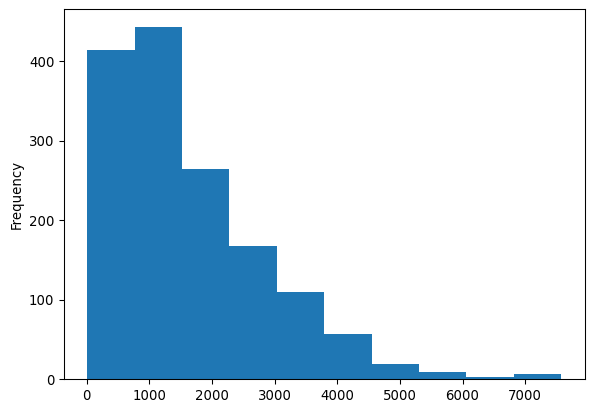

In [37]:
#5. Histogramme
stations_toilettes['distance'].plot(kind = "hist")

Le mode de la distribution est entre 1 et 2 km, ce
qui est une petite distance tout de même !
C’est normal, il ne s’agit pas de l’ensemble des
toilettes publiques de la ville de Paris mais
de celles gérées par la RATP. Rassurez-vous, au
moins dans Paris intra-muros, vous n’avez pas
à systématiquement marcher (ou rouler) autant.

# Exercices supplémentaires

Voici une fonction pour télécharger et dézipper
facilement un fonds de carte issu de `data.gouv`

In [38]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open("{}/{}.zip".format(dirname, destname), 'wb').write(myfile.content)
  with zipfile.ZipFile("{}/{}.zip".format(dirname, destname), 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice optionnel 1: télécharger et dézipper vous-même le fonds de carte</h3>

Importer le fichier avec le package `GeoPandas`
(si vous avez laissé les paramètres par défaut,
le fichier devrait
être à l’emplacement `temporary_location + "/borders/communes-20210101.shp"`).

</div>

In [39]:
# 1) télécharger les données communales
url = "https://www.data.gouv.fr/fr/datasets/r/0e117c06-248f-45e5-8945-0e79d9136165"
download_unzip(url)

In [40]:
# 2) Importer le fichier
#communes_borders = gpd.read_file(temporary_location + "/borders/communes-20220101.shp")

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice optionnel 2 : Utiliser les arrondissements fournis par l'open data parisien</h3>

1.  Importer les données de découpage des arrondissements parisiens à l’adresse
    <https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr>
2.  Vérifier sur une carte que les découpages des arrondissements sont bien présents.
3.  Vérifier l’attribut `crs`. Est-il cohérent avec celui des données communales ?
4.  Retirer Paris du jeu de données communales et utiliser les arrondissements
    pour enrichir (nommer l’objet obtenu `data_borders`). Ici, on peut ne pas se
    soucier de la variable commune de superficie aux niveaux différents car on
    va la recréer. En revanche, renommer la variable `c_arinsee` en `insee` avec
    la méthode `rename` et faire attention aux types des variables

</div>

In [41]:
#1) Importer arrondissements

# sometimes, geopandas files to import directly from
# url so proceeding in two times
url = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
download_pb(url, "arrondissements.geojson")

arrondissements = gpd.read_file("arrondissements.geojson")
arrondissements = arrondissements.to_crs(2154)

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 206kiB [00:00, 3.05MiB/s]

<Axes: >

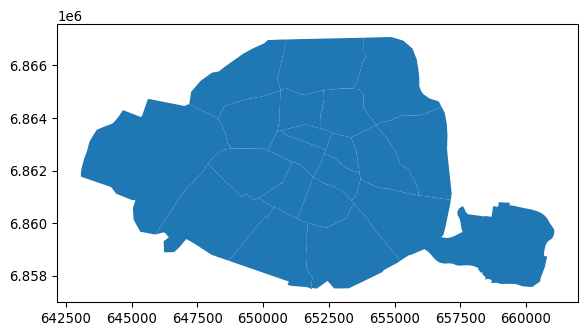

In [42]:
#2) Vérifier présence arrondissements
arrondissements.plot()

In [43]:
#3) Vérifier l'attribut `crs`. Est-il cohérent ?
print(communes_borders.crs)
print(communes_borders.crs == arrondissements.crs)
# Oui, les deux fonds de carte ont le même attribut CRS, pas besoin de convertir les projections de l'une d'entre elles

EPSG:4326
False

In [44]:
#4) Retirer Paris et ajouter les arrondissements
## On fait en sorte que les colonnes de arrondissements soient les mêmes que celles de communes borders

arrondissements = arrondissements.rename(columns = {"c_arinsee": "INSEE_DEP"})
arrondissements['INSEE_DEP'] = "75"

arrondissements = arrondissements.rename(columns = {"c_arinsee": "INSEE_DEP"})
arrondissements['INSEE_DEP'] = "75"
# On enlève la ligne du contour de Paris initiale, et on ajoute à la place les lignes d'arrondissements
data_paris = pd.concat(
    [
        communes_borders[communes_borders["INSEE_DEP"] != "75"].to_crs(2154),
        arrondissements.to_crs(2154)
    ], ignore_index=True)

data_paris.tail(2)

2 rows × 21 columns

## Jointures spatiales

L’objectif de cet exercice est de ne conserver que les
lignes de transports à l’intérieur de Paris intra-muros.
Il s’agit d’appliquer les jointures spatiales de manière
un petit peu différente à précédemment.

1.  Utiliser l’URL <https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr> pour récupérer les lignes de transport
    de la RATP. L’appeler `transports`.
2.  A partir des arrondissements parisiens, utiliser `unary_union` pour créer un unique polygone parisien. Utiliser `within` pour ne conserver que les points de `transports` qui se trouvent
    dans Paris intra-muros
3.  Représenter graphiquement

:::

In [45]:
url = "https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
# sometimes, geopandas files to import directly from
# url so proceeding in two times
download_pb(url, "transports.geojson")

transports = gpd.read_file("transports.geojson").to_crs(2154)

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 228kiB [00:00, 1.79MiB/s]

Downloading: : 665kiB [00:00, 2.72MiB/s]

Downloading: : 1.88MiB [00:00, 4.55MiB/s]

Downloading: : 2.28MiB [00:00, 3.28MiB/s]

Downloading: : 3.25MiB [00:00, 4.27MiB/s]

In [46]:
#2)
paris = data_paris.loc[data_paris['INSEE_DEP']=="75"].geometry.unary_union
transports_paris = transports[transports.geometry.within(paris)]

La carte obtenue aura l’aspect suivant:

<Axes: >

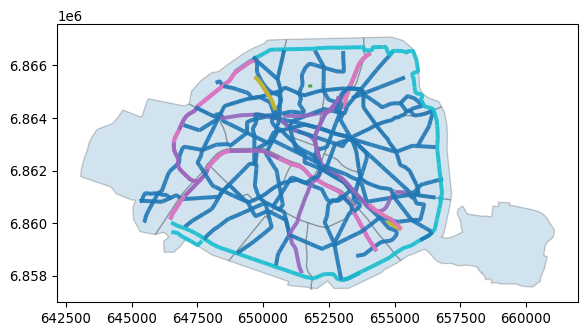

In [47]:
base = data_paris[data_paris['INSEE_DEP'] == '75'].plot(alpha = 0.2, edgecolor = 'black')
transports_paris.plot(ax=base, column='mode', alpha = 0.9, linewidth=3)

Cette fois, on a bien conservé que les lignes de transport dans
Paris. Un peu de travail sur le rendu serait nécessaire pour
obtenir une belle carte. Vous pouvez le faire en exercice, après
avoir consulté le chapitre relatif à la cartographie dans
la partie visualisation de données.